In [20]:
import os

real_world_dir = "../RealWorld/Trajectories"
simulation_dir = "../Simulation/mujoco/Trajectories"



In [21]:
import pandas as pd
import numpy as np

def load_trajectory(filename, base_dir):
    """Load a trajectory file from the specified directory"""
    filepath = os.path.join(base_dir, filename)
    if os.path.exists(filepath):
        return pd.read_csv(filepath)
    return None

# Get list of trajectory files
real_world_files = os.listdir(real_world_dir)
simulation_files = os.listdir(simulation_dir)

# Load all trajectories into dictionaries
real_world_trajectories = {}
simulation_trajectories = {}

for filename in real_world_files:
    name = os.path.splitext(filename)[0]
    real_world_trajectories[name] = load_trajectory(filename, real_world_dir)

for filename in simulation_files:
    name = os.path.splitext(filename)[0] 
    simulation_trajectories[name] = load_trajectory(filename, simulation_dir)


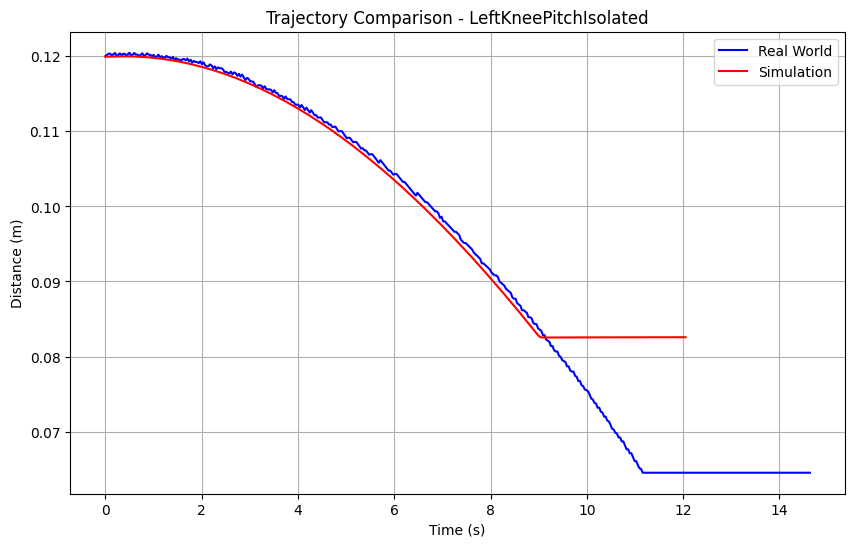

In [22]:
import matplotlib.pyplot as plt

# Plot each trajectory pair
for name in real_world_trajectories.keys():
    if name in simulation_trajectories:
        plt.figure(figsize=(10, 6))
        
        # Plot real world trajectory
        real_traj = real_world_trajectories[name]
        plt.plot(real_traj['Time(s)'], real_traj['Distance(m)'], 
                label='Real World', color='blue')
        
        # Plot simulation trajectory 
        sim_traj = simulation_trajectories[name]
        plt.plot(sim_traj['Time(s)'], sim_traj['Distance(m)'],
                label='Simulation', color='red')
        
        plt.title(f'Trajectory Comparison - {name}')
        plt.xlabel('Time (s)')
        plt.ylabel('Distance (m)')
        plt.legend()
        plt.grid(True)
        plt.show()
